<a href="https://colab.research.google.com/github/softwarerbfl/imageProcessing/blob/main/Notebook-Week7/2022_1_ImgProc_HW7_%EB%B0%B0%EA%B7%9C%EB%A6%AC_32202018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영상정보처리 7주차 과제 템플리트
- 점수: 10점 만점
- 이미지 경로 잘못 사용한 경우: -3
- 문제1: 10점 

이름: 배규리           
학번: 32202018

# 구글 드라이브 마우팅 및 작업 경로로 이동
- 다음 쉘에 필요한 작업을 하시오. 

In [ ]:
from google.colab import drive 
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/Colab\ Notebooks/2022_영상정보처리/Notebook-Week\ 7
from google.colab.patches import cv2_imshow
import matplotlib.cm as cm
import numpy as np, cv2

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/2022_영상정보처리/Notebook-Week 7


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# matplot color display
def show_with_matplotlib(img, title):
    if img is None:
      print("show_with_matplotlib: Could not read the image.")
      return

    if img.shape[2] != 3:
      print()
      print("show_with_matplotlib: given image does not contains 3 channels")
      return

    # Convert BGR image to RGB:
    img_RGB = img[:, :, ::-1]

    # Show the image using matplotlib:
    plt.imshow(img_RGB)
    plt.title(title)
    plt.show()

# matplot grayscale display
def show_with_matplotlib_gray(img, title):
   if img is None:
      print("show_with_matplotlib_gray: Could not read the image.")
      return

   if img.ndim > 2:
      print()
      print("show_with_matplotlib: given image has more than 2 dim")
      return
      
   plt.imshow(img, cmap="gray")
   plt.title(title)
   plt.show()

def show_with_matplotlib_MO4(color_img, title, pos, axis_show):
    # Convert BGR image to RGB
    img_RGB = color_img[:, :, ::-1]

    ax = plt.subplot(3, 6, pos)
    plt.imshow(img_RGB)
    plt.title(title)

    if not axis_show:
      plt.axis('off')

    plt.show()

다음의 경로는 변경하지 말것

In [ ]:
image_path = '../Dongkeun-OpenCV-ImgData/lena.jpg' 

##문제 1:


1. 주어진 영상을 grayscale 로 읽어 들인다 (org_img)
2. 입력 영상과 같은 크기의 빈 컬러 이미지를 만든다 (new_image)
3. 소스코드 color_map_custom_key_colors.py를 참조하여, 자신이 원하는대로 컬러맵을 5개의 값을 이용해 만든다.  
4. 소스코드 color_map_custom_legend.py를 참조하여, Legend를 만든 후 "Legend"라는 타이틀을 부여한 후 출력한다. 
5. 만들어진 컬러맵을 LUT(), applyColorMap()을 이용해 컬러맵을 주어진 영상에 적용해서 두 개의 이미지의 타이틀을 각각 "LUT() Application", "applyColorMap() Application" 로 한 다음 출력한다. 





In [ ]:
#1
org_img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

In [ ]:
#2
new_image=np.zeros(org_img.shape,np.uint8)

In [ ]:
dict_color={0:"blue",1:"green",2:"red"}
def build_lut(cmap):
    """Builds look up table based on 'key colors' using np.linspace()"""

    lut = np.empty(shape=(256, 3), dtype=np.uint8)

    max = 256
    # build lookup table:
    lastval, lastcol = cmap[0]
    for step, col in cmap[1:]:
        val = int(step * max)
        for i in range(3):
            lut[lastval:val, i] = np.linspace(lastcol[i], col[i], val - lastval)

        lastcol = col
        lastval = val

    return lut

def apply_color_map_1(gray, cmap):
    #cv2.LUT를 사용하여 COLOR MAP만들기

    lut = build_lut(cmap)
    s0, s1 = gray.shape
    out = np.empty(shape=(s0, s1, 3), dtype=np.uint8)

    for i in range(3):
        out[..., i] = cv2.LUT(gray, lut[:, i])
    return out


def apply_color_map_2(gray, cmap):
    #cv2.applyColorMap를 사용하여 COLOR MAP만들기

    lut = build_lut(cmap)
    lut_reshape = np.reshape(lut, (256, 1, 3))
    im_color = cv2.applyColorMap(gray, lut_reshape)
    return im_color

In [ ]:
#3
color_map=((0,(255,127,0)),(0.25,(255,252,191)),(0.5,(223,250,205)),(0.75,(255,204,191)),(1,(224,204,255)))

In [ ]:
def build_lut_image(cmap, height):
    """Builds the legend image"""

    lut = build_lut(cmap)
    image = np.repeat(lut[np.newaxis, ...], height, axis=0)

    return image


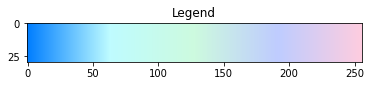

In [ ]:
#4
legend=build_lut_image(color_map,30)
show_with_matplotlib(legend, "Legend")

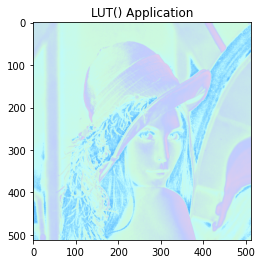

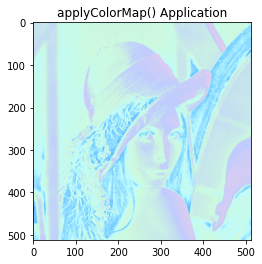

In [ ]:
#5

#LUT()적용
image_LUT=apply_color_map_1(org_img,color_map)
show_with_matplotlib(image_LUT,"LUT() Application")
#applyColorMap()적용
image_ACM=apply_color_map_2(org_img,color_map)
show_with_matplotlib(image_ACM,"applyColorMap() Application")